In [1]:
%matplotlib inline
from pathlib import Path
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
import librosa, librosa.display

# Basic Feature Extraction

Somehow, we must extract the characteristics of our audio signal that are most relevant to the problem we are trying to solve. For example, if we want to classify instruments by timbre, we will want features that distinguish sounds by their timbre and not their pitch. If we want to perform pitch detection, we want features that distinguish pitch and not timbre.

This process is known as feature extraction.

Let's begin with twenty audio files: ten kick drum samples, and ten snare drum samples. Each audio file contains one drum hit.

Read and store each signal:

In [2]:
Moisture_14_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_14_*.wav')
]
Moisture_16_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_16_*.wav')
]
Moisture_17_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_17_*.wav')
]

Moisture_19_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_19_*.wav')
]

Moisture_20_percent = [
    librosa.load(p)[0] for p in Path().glob('wav/train/6 by 1_20_*.wav')
]

In [3]:
len(Moisture_14_percent)

20

In [4]:
len(Moisture_16_percent)

20

In [5]:
len(Moisture_17_percent)

20

In [6]:
len(Moisture_19_percent)

20

In [7]:
len(Moisture_20_percent)

20

Display the kick drum signals:

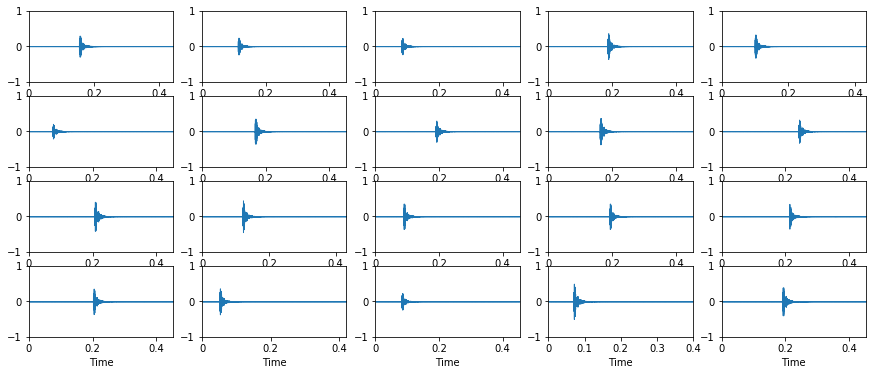

In [8]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(Moisture_14_percent):
    plt.subplot(4, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

Display the snare drum signals:

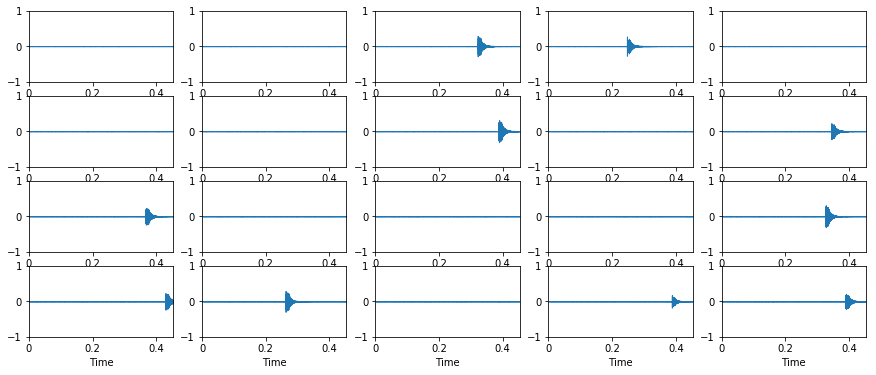

In [9]:
plt.figure(figsize=(15, 6))
for i, x in enumerate(Moisture_20_percent):
    plt.subplot(4, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

## Constructing a Feature Vector

A *feature vector* is simply a collection of features. Here is a simple function that constructs a two-dimensional feature vector from a signal:

In [10]:
def extract_features(signal):
    return [
        librosa.feature.mfcc(signal)[0, 0],
        #librosa.feature.spectral_centroid(signal)[0, 0],
    ]

If we want to aggregate all of the feature vectors among signals in a collection, we can use a list comprehension as follows:

In [11]:
Moisture_14_percent_features = numpy.array([extract_features(x) for x in Moisture_14_percent])
Moisture_16_percent_features = numpy.array([extract_features(x) for x in Moisture_16_percent])
Moisture_17_percent_features = numpy.array([extract_features(x) for x in Moisture_17_percent])
Moisture_19_percent_features = numpy.array([extract_features(x) for x in Moisture_19_percent])
Moisture_20_percent_features = numpy.array([extract_features(x) for x in Moisture_20_percent])

Visualize the differences in features by plotting separate histograms for each of the classes:

Text(0,0.5,'Count')

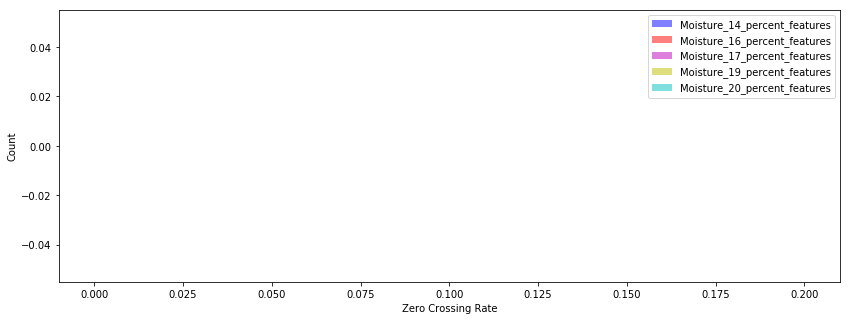

In [12]:
plt.figure(figsize=(14, 5))
plt.hist(Moisture_14_percent_features[:,0], color='b', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_16_percent_features[:,0], color='r', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_17_percent_features[:,0], color='m', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_19_percent_features[:,0], color='y', range=(0, 0.2), alpha=0.5, bins=20)
plt.hist(Moisture_20_percent_features[:,0], color='c', range=(0, 0.2), alpha=0.5, bins=20)
plt.legend(('Moisture_14_percent_features', 'Moisture_16_percent_features',
            'Moisture_17_percent_features','Moisture_19_percent_features',
            'Moisture_20_percent_features'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')
 #b,c,r,y,g,m,k

In [13]:
plt.figure(figsize=(14, 5))
plt.hist(Moisture_14_percent_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_16_percent_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_17_percent_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_19_percent_features[:,1], color='r', range=(0, 4000), bins=30, alpha=0.6)
plt.hist(Moisture_20_percent_features[:,1], color='b', range=(0, 4000), bins=30, alpha=0.6)
plt.legend(('Moisture_14_percent_features','Moisture_16_percent_features',
            'Moisture_17_percent_features','Moisture_19_percent_features',
            'Moisture_20_percent_features'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

IndexError: index 1 is out of bounds for axis 1 with size 1

<Figure size 1008x360 with 0 Axes>

## Feature Scaling

The features that we used in the previous example included zero crossing rate and spectral centroid. These two features are expressed using different units. This discrepancy can pose problems when performing classification later. Therefore, we will normalize each feature vector to a common range and store the normalization parameters for later use.  

Many techniques exist for scaling your features. For now, we'll use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html).  `MinMaxScaler` returns an array of scaled values such that each feature dimension is in the range -1 to 1.

Let's concatenate all of our feature vectors into one *feature table*:

In [14]:
feature_table = numpy.vstack((Moisture_14_percent_features, Moisture_16_percent_features,
                              Moisture_17_percent_features, Moisture_19_percent_features,
                              Moisture_20_percent_features))
print(feature_table.shape)

(100, 1)


Scale each feature dimension to be in the range -1 to 1:

In [15]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1.]
[1.]


Plot the scaled features:

In [16]:
plt.scatter(training_features[:20,0], training_features[:20,1], c='b')
plt.scatter(training_features[20:,0], training_features[20:,1], c='k')
plt.scatter(training_features[::20,0], training_features[::20,0], c='y')
plt.scatter(training_features[::20,0], training_features[::20,1], c='g')
plt.scatter(training_features[:20,0], training_features[:20,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')
#b,c,r,y,g,m,k

IndexError: index 1 is out of bounds for axis 1 with size 1

## 1.K-NN Algorithim

## Cross Validation

<a href="https://en.wikipedia.org/wiki/Cross-validation_(statistics)">K-fold cross validation</a> is a method for evaluating the correctness of a classifier.

For example, with 10-fold cross validation:

1. Divide the data set into 10 random partitions.
2. Choose one of the partitions as the test set. Train on the other nine partitions.
3. Repeat for the partitions.

Why cross validation is good?
* In K-fold cross validation, evaluation on models can be done K times, but each time on a different partition of the data. 
* It can be used to tune parameters and to choose the best model and/or features.

In [17]:
Moisture_14_percent_labels = numpy.zeros(20)
Moisture_16_percent_labels = numpy.zeros(20)
Moisture_17_percent_labels = numpy.zeros(20)
Moisture_19_percent_labels = numpy.ones(20)
Moisture_20_percent_labels = numpy.ones(20)

In [18]:
training_labels = numpy.concatenate((Moisture_14_percent_labels, Moisture_16_percent_labels,
                                     Moisture_17_percent_labels, Moisture_19_percent_labels,
                                     Moisture_20_percent_labels))

In [19]:
print (training_features)
print (training_labels)

[[-0.91733622]
 [-0.89963104]
 [-0.96955648]
 [-0.70409914]
 [-1.        ]
 [-0.88949439]
 [-0.80385176]
 [-0.86874086]
 [-0.95812433]
 [-0.8778937 ]
 [-0.71424708]
 [-0.85816653]
 [-0.93357483]
 [-0.93954188]
 [-0.83122686]
 [-0.83652133]
 [-0.88808258]
 [-0.96955648]
 [-0.79627208]
 [-0.85977241]
 [ 0.85116391]
 [ 1.        ]
 [ 0.76696734]
 [ 0.82115103]
 [ 0.74199247]
 [ 0.92473147]
 [ 0.88291622]
 [ 0.81877537]
 [ 0.80754189]
 [ 0.83888579]
 [ 0.84852748]
 [ 0.69224322]
 [ 0.85516227]
 [ 0.69736436]
 [ 0.74768325]
 [ 0.72524352]
 [ 0.82296409]
 [ 0.66119016]
 [ 0.73433758]
 [ 0.69568871]
 [ 0.23798403]
 [ 0.16516583]
 [ 0.01450378]
 [ 0.08569155]
 [ 0.14460174]
 [ 0.14244512]
 [ 0.17619926]
 [ 0.04929413]
 [ 0.15037296]
 [ 0.14752312]
 [ 0.14893064]
 [ 0.08976868]
 [ 0.08202338]
 [ 0.14800967]
 [ 0.03323054]
 [ 0.13099577]
 [ 0.03965728]
 [ 0.05509882]
 [ 0.01535987]
 [ 0.00883961]
 [-0.3994486 ]
 [-0.22839932]
 [-0.22661705]
 [-0.24825924]
 [-0.30022621]
 [-0.08744751]
 [-0.21996

Plot The Features

In [20]:
plt.scatter(training_features[:,0], training_features[:,1])

IndexError: index 1 is out of bounds for axis 1 with size 1

Load model and perform cross-validation

Initialize the K-Nearest Neighbor classifier:
Note that K=3 here (3 neighbors), but K is so-called a hyperparameter, which can be tuned to select the best value 

In [21]:
model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)

Perform 5-fold cross validation (cv=5):

In [22]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [24]:
print (acc)
print (acc.mean())

[1.  1.  0.9 0.7 0.5]
0.82


## Tuning parameter K

Since value of K has been arbitrarily chosen, we do not know whether it was the best choice (although here in this example, we have a perfect score anyway...). Therefore, testing the result with several other values will help to choose the best parameter.

In [26]:
K_choices = [1,2,3,4,5]
for k in K_choices:
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
    mean_score = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5).mean()
    print ("[K=%d] Accuracy=%.3f"%(k, mean_score))

[K=1] Accuracy=0.800
[K=2] Accuracy=0.800
[K=3] Accuracy=0.820
[K=4] Accuracy=0.860
[K=5] Accuracy=0.830


## 2.SVM

In [27]:
from sklearn import svm
model = svm.SVC(gamma=0.001)
#model = svm.SVC(gamma='scale', decision_function_shape='ovo')

In [28]:
model.fit(training_features, training_labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Perform 5-fold cross validation (cv=5):

In [29]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [30]:
print (acc)
print (acc.mean())

[0.6 0.6 0.6 0.6 0.6]
0.6


## 3.Linear Regression

In [31]:
model = sklearn.linear_model.LinearRegression()

In [32]:
model.fit(training_features, training_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [34]:
print (acc)
print (acc.mean())

[0. 0. 0. 0. 0.]
0.0


## 4.Logistic Regression

In [35]:
model = sklearn.linear_model.LogisticRegression()

In [36]:
model.fit(training_features, training_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [38]:
print (acc)
print (acc.mean())

[0.  0.6 0.  0.6 0.6]
0.36


## 5.Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
model = sklearn.naive_bayes.GaussianNB()

In [42]:
model.fit(training_features, training_labels)

GaussianNB(priors=None)

In [43]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [44]:
print (acc)
print (acc.mean())

[0.85 0.95 0.95 0.6  0.2 ]
0.7100000000000001


## 6.Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

/home/rutherford/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [46]:
training_features, training_labels = make_classification(n_samples=100, n_features=4,
                                                         n_informative=2, n_redundant=0,
                                                         random_state=0, shuffle=False)

In [47]:
model = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)

In [48]:
model.fit(training_features, training_labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [49]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [50]:
print (acc)
print (acc.mean())

[0.9047619  0.85       0.9        0.95       0.89473684]
0.8998997493734334


## 7.Gausian Mixture Models

In [52]:
from sklearn.mixture import GMM
model = sklearn.mixture.GaussianMixture()

In [53]:
model.fit(training_features, training_labels)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=1, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [54]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [55]:
print (acc)
print (acc.mean())

[-6.58545193 -6.71819301 -6.1137356  -6.00332387 -7.42954834]
-6.570050548993097


## Bayesian Gausian Mixture Model

In [56]:
model = sklearn.mixture.BayesianGaussianMixture()

In [57]:
model.fit(training_features, training_labels)

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
            degrees_of_freedom_prior=None, init_params='kmeans',
            max_iter=100, mean_precision_prior=None, mean_prior=None,
            n_components=1, n_init=1, random_state=None, reg_covar=1e-06,
            tol=0.001, verbose=0, verbose_interval=10, warm_start=False,
            weight_concentration_prior=None,
            weight_concentration_prior_type='dirichlet_process')

In [58]:
acc  = sklearn.model_selection.cross_val_score(model, training_features, training_labels, cv=5)

In [59]:
print (acc)
print (acc.mean())

[-6.70471286 -6.8432347  -6.2126812  -6.09692119 -7.5846933 ]
-6.688448648283929
